In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image 
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
data = []
labels = []
classes = 43
cur_path = os.getcwd()


C:\Users\saura\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\saura\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\saura\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\saura\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

# Retrieving the images and their labels

In [3]:
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays

In [5]:
data = np.array(data)
labels = np.array(labels)

# Printing the Shape of data and lables

In [6]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


# Splitting training and testing dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Printing the Shape of X_trian,y_train,X_test and y_yest

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# Converting the labels into one hot encoding

In [9]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Building the model

In [10]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Compilation of the model

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
epochs = 15

In [13]:
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 128s 4ms/step - loss: 2.3080 - acc: 0.4379 - val_loss: 0.6927 - val_acc: 0.8281
Epoch 2/15
31367/31367 [==============================] - 139s 4ms/step - loss: 0.7249 - acc: 0.7841 - val_loss: 0.2527 - val_acc: 0.9288
Epoch 3/15
31367/31367 [==============================] - 132s 4ms/step - loss: 0.4781 - acc: 0.8583 - val_loss: 0.2080 - val_acc: 0.9376
Epoch 4/15
31367/31367 [==============================] - 151s 5ms/step - loss: 0.3700 - acc: 0.8915 - val_loss: 0.1208 - val_acc: 0.9665
Epoch 5/15
31367/31367 [==============================] - 154s 5ms/step - loss: 0.3222 - acc: 0.9054 - val_loss: 0.1075 - val_acc: 0.9693
Epoch 6/15
31367/31367 [==============================] - 197s 6ms/step - loss: 0.3074 - acc: 0.9118 - val_loss: 0.0770 - val_acc: 0.9784
Epoch 7/15
31367/31367 [=====

In [14]:
model.save("My_model.h5")

# plotting graphs for accuracy 

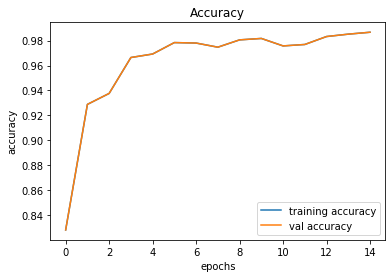

In [26]:
plt.figure(0)
plt.plot(history.history['val_acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

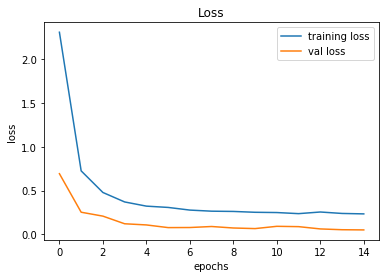

In [24]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# testing accuracy on test dataset

In [18]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')

In [19]:
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

In [22]:
data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

model.save("traffic_classifier.h5")

0.953285827395091
